In [1]:
#Importing necessary libraries
import numpy as np
from keras.layers import Input, Dense, Dropout
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping, TensorBoard
from keras import optimizers
from keras import backend as K
import keras

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import metrics

import math
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook

import string
plt.rc('text', usetex=False)

import pickle

from Autoencoder_Utils import *

/usr/local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


In [2]:
TYPE = ""
TYPE = "_10perc"
TYPE = "_1perc"


pids = ['a', 'b', 'c', 'd', 'e']
pid_to_train = 'c' 


retain_dict = pickle.load( open( "retain_dict_{}.p".format(TYPE), "rb" ) )
all_input = retain_dict.pop("test_input")
all_input_dec = retain_dict.pop("test_input_dec")
all_aux = retain_dict.pop("test_aux")
all_MC = retain_dict.pop("test_MC")
l_score = retain_dict.pop("l_score")
all_decoded_dict = retain_dict.pop("save_decoded_dict")
all_decoded_dict_dec = retain_dict.pop("save_decoded_dict_dec")

l_encoding_dim = all_decoded_dict.keys()


RangeIndex(start=0, stop=18, step=1)
248768
248768
RangeIndex(start=0, stop=18, step=1)
248768
248768
RangeIndex(start=0, stop=18, step=1)
248768
248768
RangeIndex(start=0, stop=18, step=1)
248768
248768
RangeIndex(start=0, stop=18, step=1)
248768
248768
RangeIndex(start=0, stop=18, step=1)
248768
248768
RangeIndex(start=0, stop=18, step=1)
248768
248768


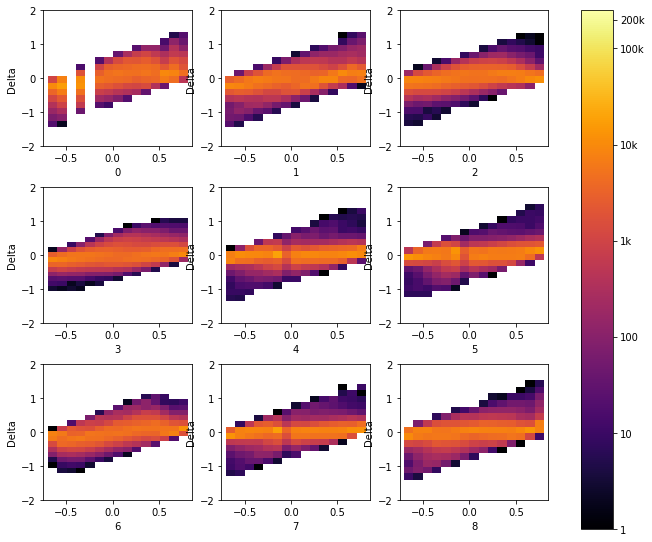

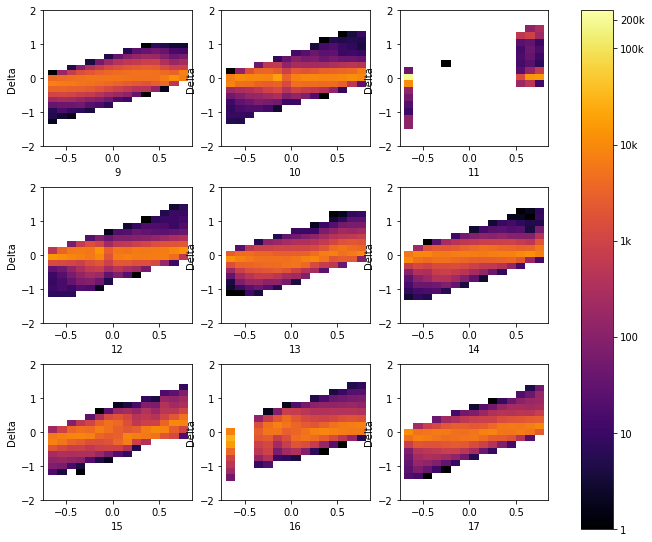

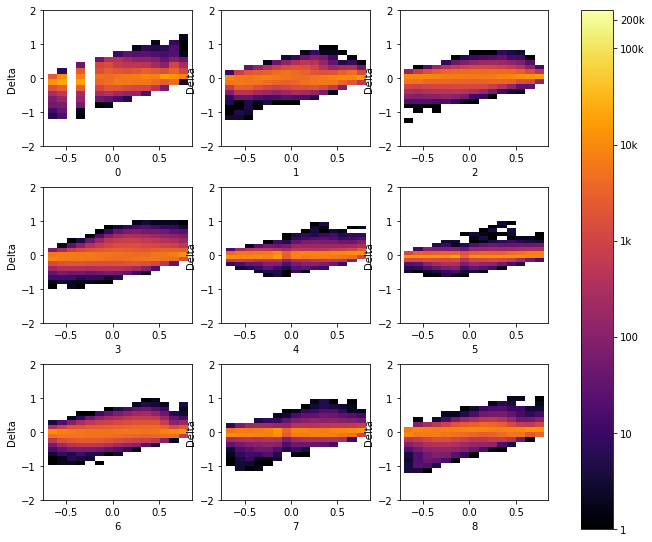

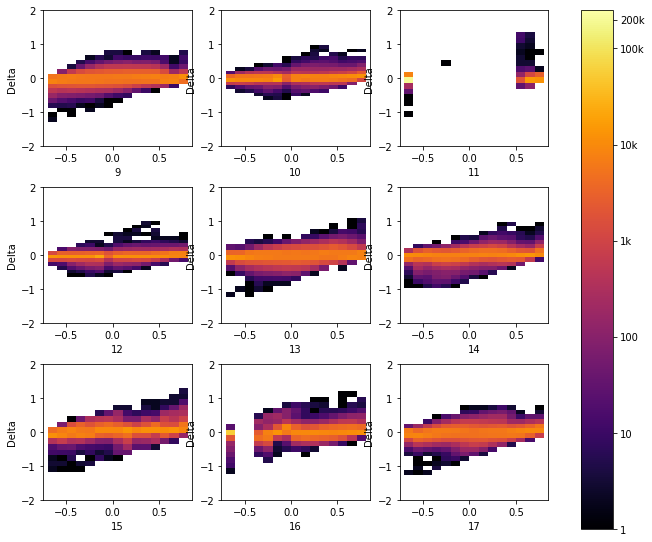

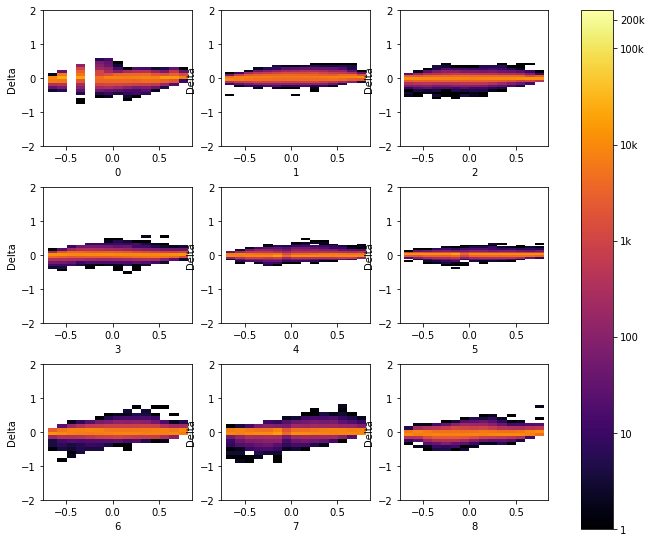

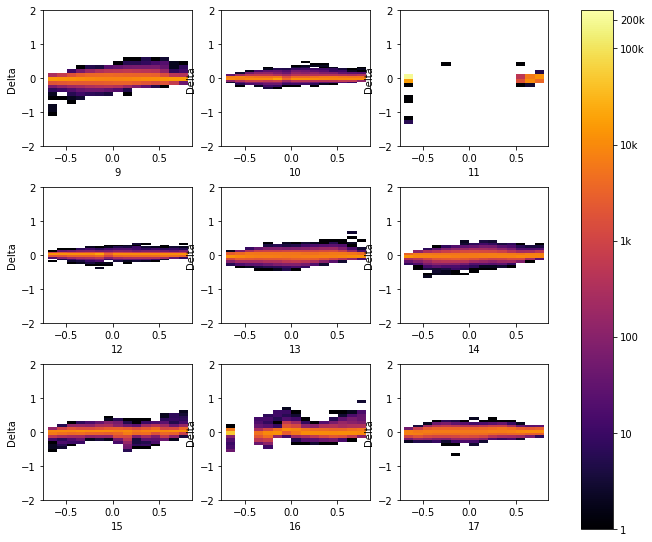

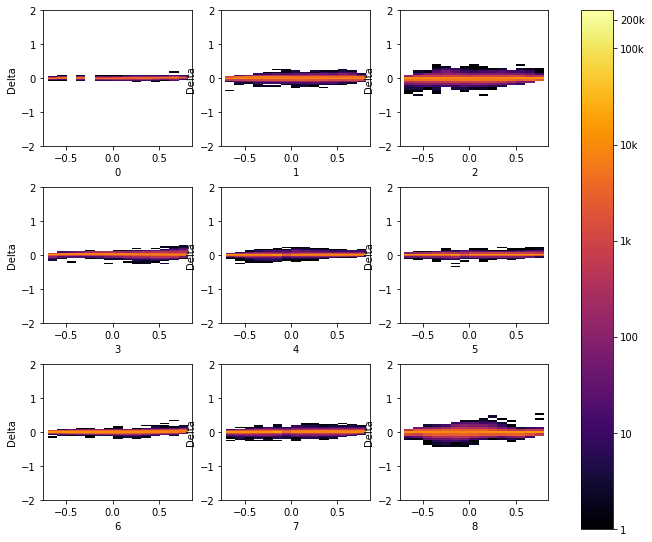

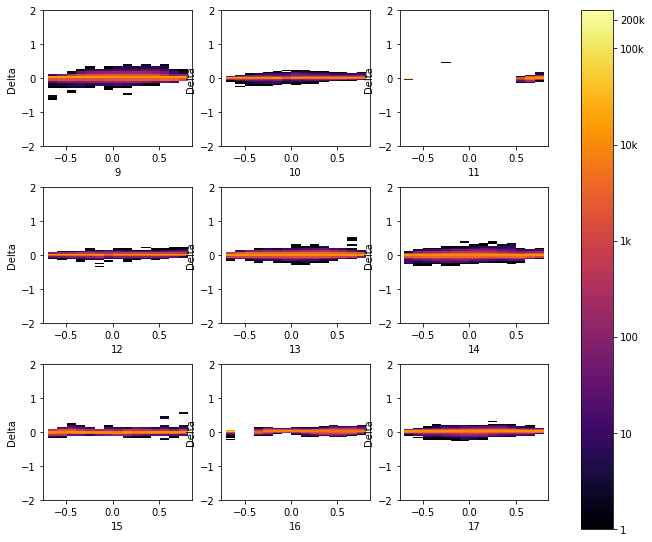

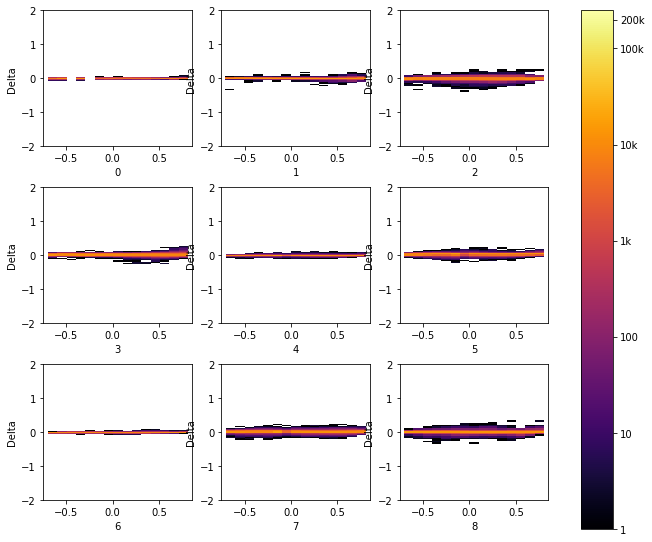

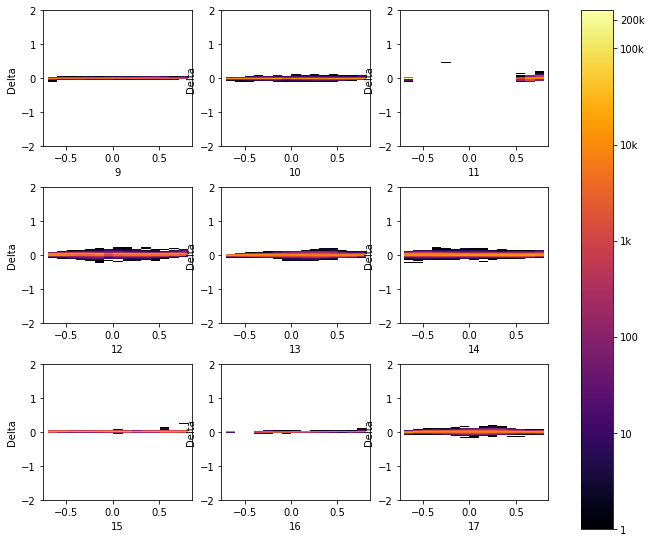

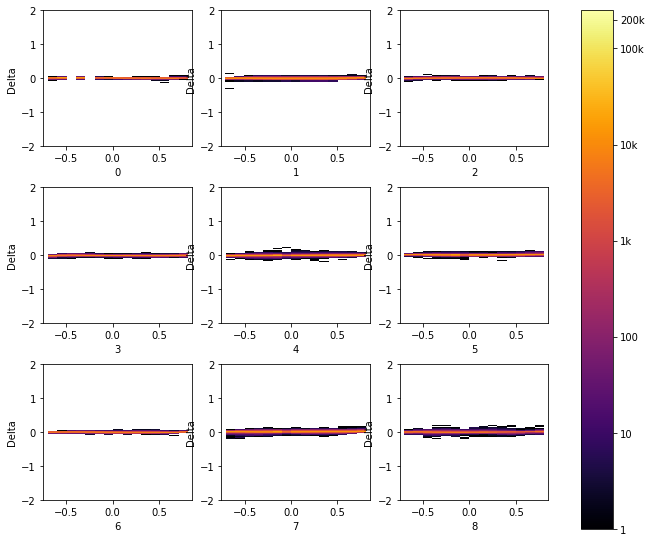

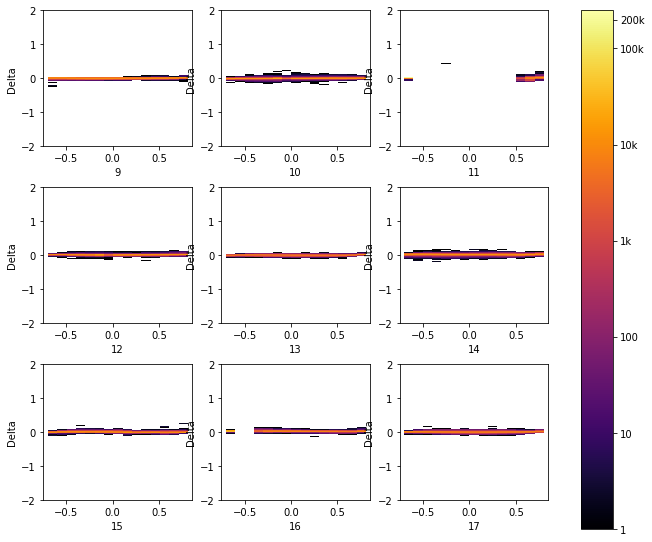

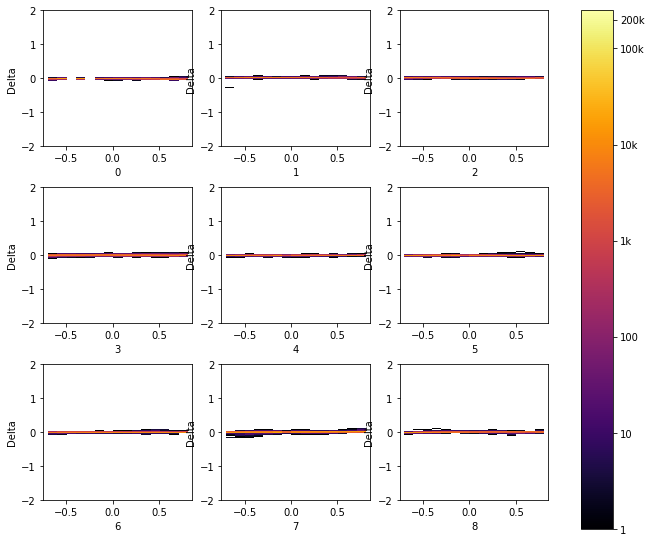

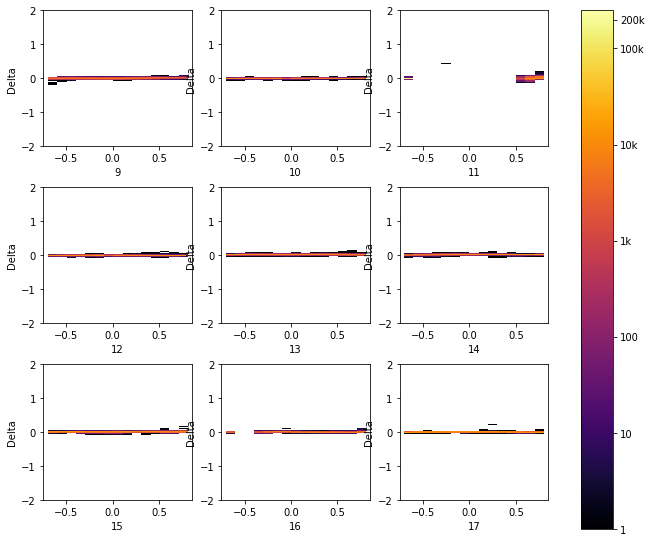

In [66]:
#l_minmax=[[-6.,6.],[-200.,0],[-0.9,0.4],[-1., 1.],[-100.,100],[0,200000],[0,1500],[-130,50],[-1.,1.], [-1.,1.], [-110.,100.], [-1.,1.], [0.,200000.], [0.,40000.], [-1.,1.],[-3.,3.], [-10000.,60000.], [-70000.,70000.]]
l_minmax = [[-2,2]]*18
for encoding_dim in all_decoded_dict:
#for encoding_dim in [1]:
    plot_difference_displ(TYPE, pd.DataFrame(all_decoded_dict[encoding_dim]), pd.DataFrame(all_input), encoding_dim, Transform=False, SetMinMax=True, FTS_SCLD=True, l_minmax=l_minmax)

9 0 	[0, 1, 2, 3, 4, 5, 6, 7, 8]
9 9 	[9, 10, 11, 12, 13, 14, 15, 16, 17]
9 0 	[0, 1, 2, 3, 4, 5, 6, 7, 8]
9 9 	[9, 10, 11, 12, 13, 14, 15, 16, 17]
9 0 	[0, 1, 2, 3, 4, 5, 6, 7, 8]
9 9 	[9, 10, 11, 12, 13, 14, 15, 16, 17]
9 0 	[0, 1, 2, 3, 4, 5, 6, 7, 8]
9 9 	[9, 10, 11, 12, 13, 14, 15, 16, 17]


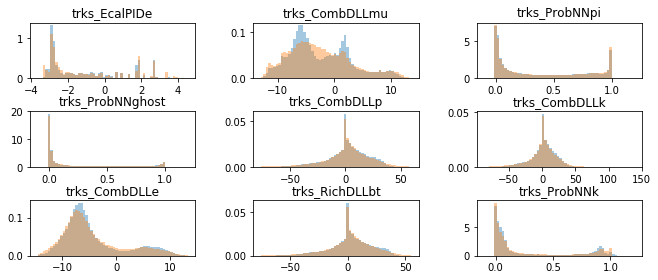

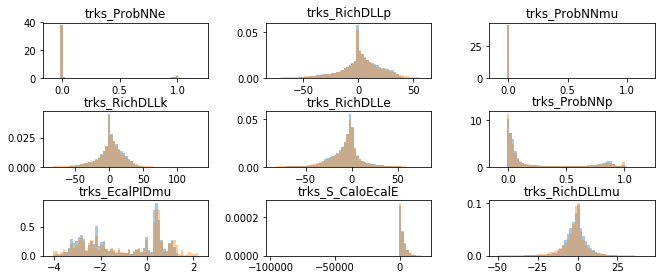

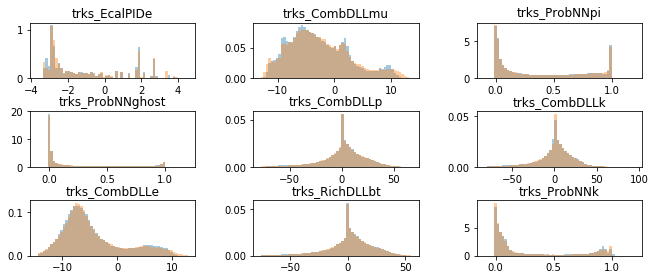

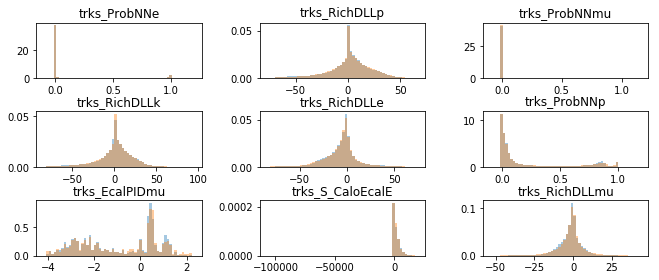

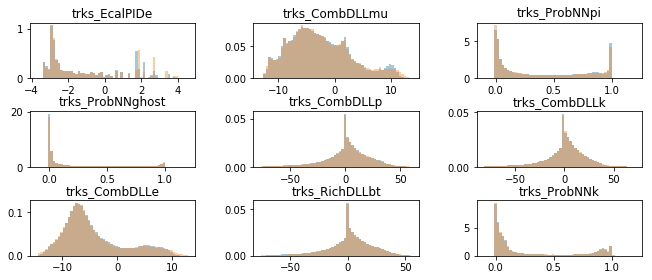

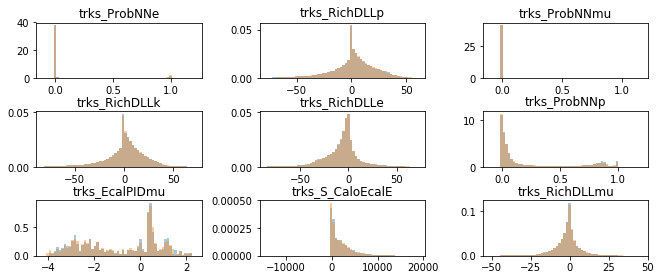

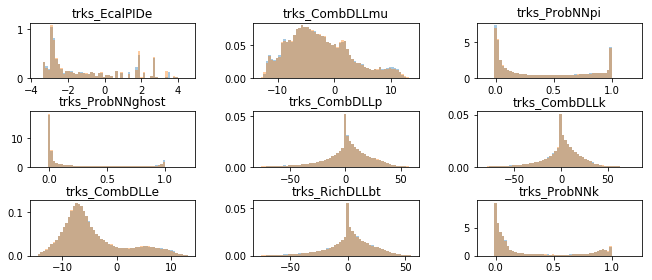

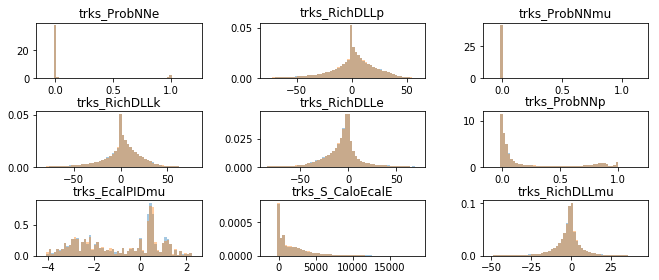

In [69]:
for encoding_dim in [3,6,9,18]:
#for encoding_dim in [6]:
    df_temp = pd.DataFrame(all_decoded_dict_dec[encoding_dim])
    df_temp_input = pd.DataFrame(all_input_dec)
    #print df_temp
    rename_dict = {}
    for i, e in enumerate(range(18)):
        rename_dict[e] = vars_list_input[i]




    #print rename_dict

    df_temp.rename(rename_dict, axis='columns', inplace=True)
    df_temp_input.rename(rename_dict, axis='columns', inplace=True)
    #print df_temp.head()

    print_features_histograms_displ(df_temp, target=df_temp_input, save_filename="_{1}_orig_uncom_distribs_{0}.png".format(TYPE, encoding_dim))

In [ ]:
for encoding_dim in all_decoded_dict:
    #print_features_histograms(pd.DataFrame(all_decoded_dict[encoding_dim]), target=pd.DataFrame(all_input))
    print_features_histograms(pd.DataFrame(all_decoded_dict_dec[encoding_dim]), target=pd.DataFrame(all_input_dec))

In [ ]:
l_minmax=[[-6.,6.],[-200.,0],[-0.9,0.4],[-1., 1.],[-100.,100],[0,200000],[0,1500],[-130,50],[-1.,1.], [-1.,1.], [-110.,100.], [-1.,1.], [0.,200000.], [0.,40000.], [-1.,1.],[-3.,3.], [-10000.,60000.], [-70000.,70000.]]
for encoding_dim in all_decoded_dict:
    plot_difference(TYPE, pd.DataFrame(all_decoded_dict_dec[encoding_dim]), pd.DataFrame(all_input_dec), encoding_dim, Transform=False, SetMinMax=False, l_minmax=l_minmax)

In [ ]:
if False:
    #FIX_POS_mu = False
    FIX_POS_mu = True
    for encoding_dim in save_decoded_dict:
        roc_curves_old(TYPE, pd.DataFrame(all_decoded_dict_dec[encoding_dim]), pd.DataFrame(all_input_dec), test_MC[:,0], encoding_dim, FIX_POS_mu)

In [ ]:
# The error stops decreasing dramatically after the encoding dimension is the number of independent variables.
plt.plot(l_encoding_dim,l_score)
plt.title("Scores 100% S0 S1 S3 Test Sample")
plt.xlabel("Encoding dimension")
plt.ylabel("Mean Squared Error")
plt.xticks(l_encoding_dim)
#plt.ylim(0, max(l_score)*1.2)
plt.ylim(0, 0.04)
plt.savefig("scores_{}.png".format(TYPE))

In [ ]:
# The error stops decreasing dramatically after the encoding dimension is the number of independent variables.
plt.semilogy(l_encoding_dim,l_score)
plt.title("Scores 100% S0 S1 S3 Test Sample")
plt.xlabel("Encoding dimension")
plt.ylabel("Mean Squared Error")
plt.xticks(l_encoding_dim)
#plt.ylim(0, max(l_score)*1.2)
plt.ylim(0.00003, 0.05)
plt.savefig("scores_log_{}.png".format(TYPE))